In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Xử lý dữ liệu training set

In [2]:

df_train = pd.read_csv("/kaggle/input/dataset/labeled_train.csv")
df_train.head()

,Date,Time,Open,High,Low,Close,Volume,Label
0,2011-01-03,01:00,1415.71,1416.54,1415.10,1415.63,1035,SELL
1,2011-01-03,02:00,1415.64,1416.43,1414.90,1415.98,736,SELL
2,2011-01-03,03:00,1415.95,1417.89,1414.59,1416.54,922,SELL
3,2011-01-03,04:00,1416.51,1418.64,1415.25,1416.75,1060,SELL
4,2011-01-03,05:00,1416.76,1420.00,1416.76,1419.48,838,SELL


In [3]:
df_train.isnull().sum()

Date      0
Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
Label     0
dtype: int64

# Line plot

In [4]:
df_train.dtypes

Date       object
Time       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Label      object
dtype: object

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

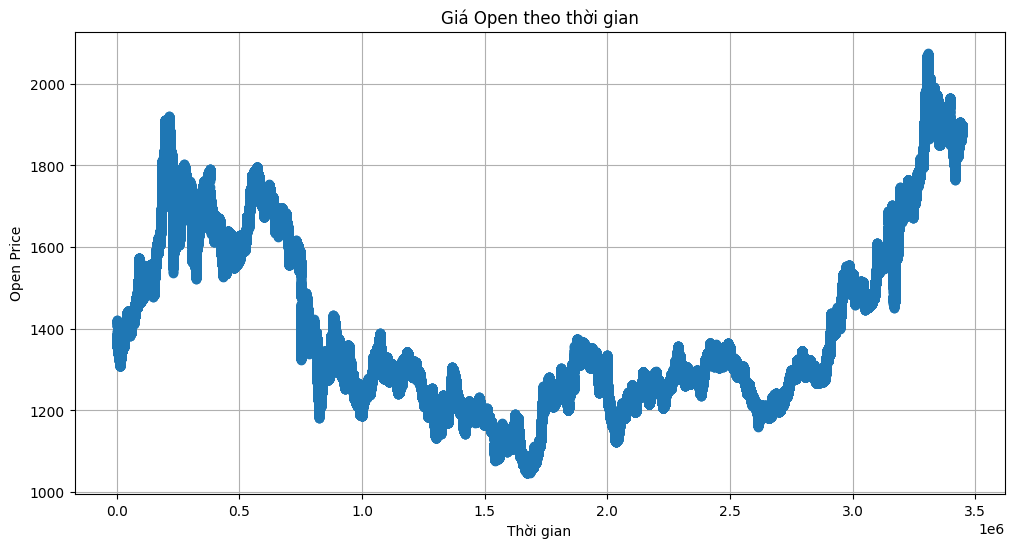

In [6]:
df_train['Open'].plot(title='Giá Open theo thời gian', marker='o',figsize=(12, 6))
plt.xlabel('Thời gian')
plt.ylabel('Open Price')
plt.grid(True)
plt.show()


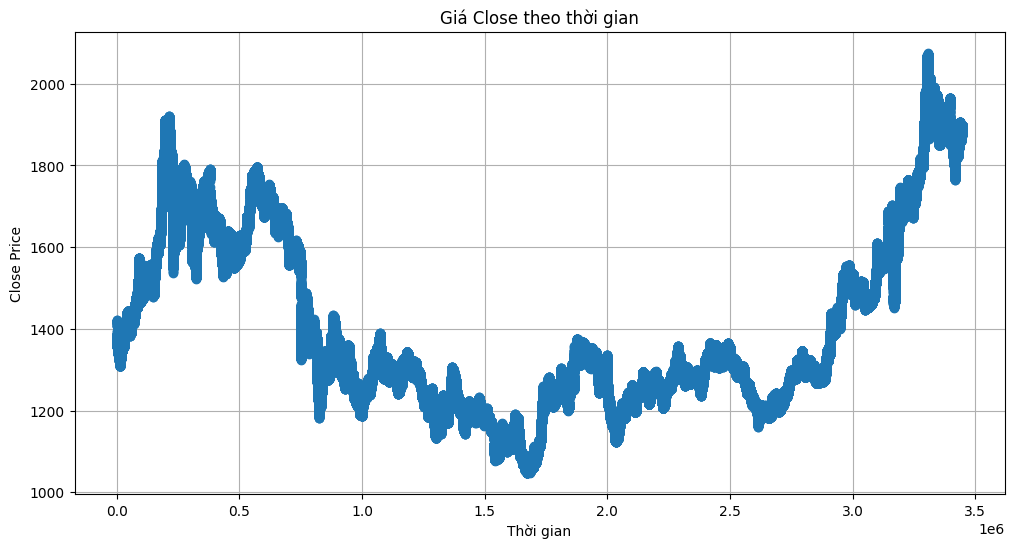

In [7]:
df_train['Close'].plot(title='Giá Close theo thời gian', marker='o',figsize=(12, 6))
plt.xlabel('Thời gian')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


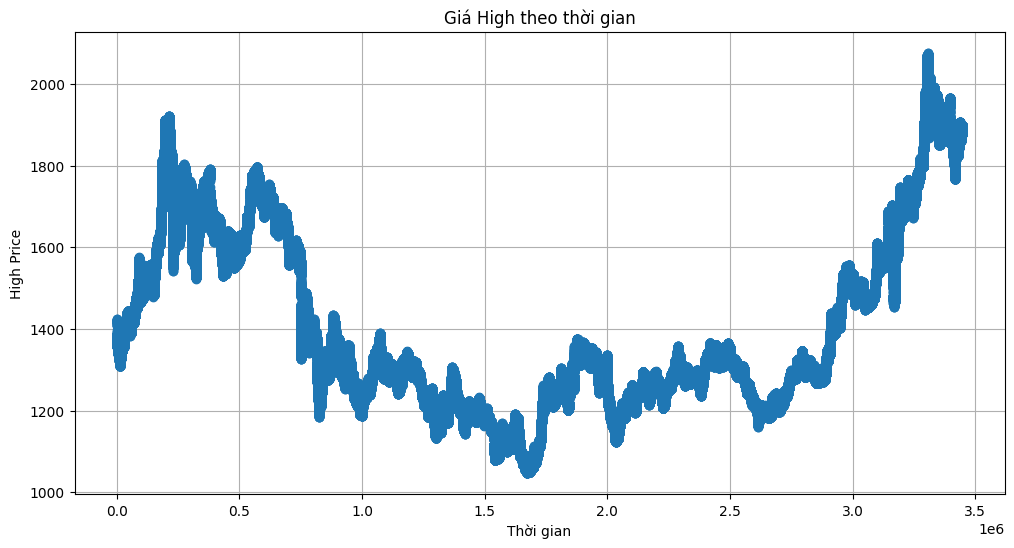

In [8]:
df_train['High'].plot(title='Giá High theo thời gian', marker='o',figsize=(12, 6))
plt.xlabel('Thời gian')
plt.ylabel('High Price')
plt.grid(True)
plt.show()


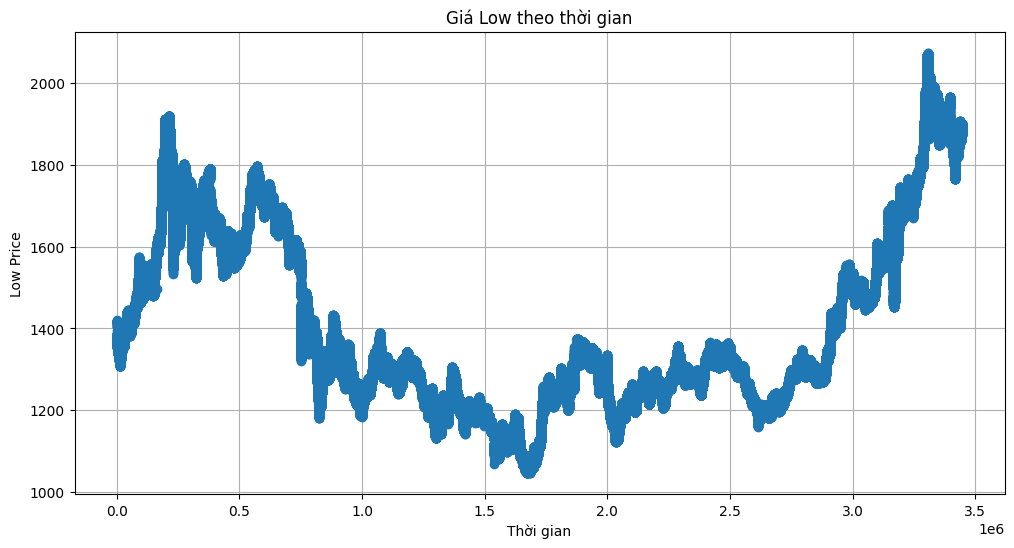

In [9]:
df_train['Low'].plot(title='Giá Low theo thời gian', marker='o',figsize=(12, 6))
plt.xlabel('Thời gian')
plt.ylabel('Low Price')
plt.grid(True)
plt.show()


## Xử lý dữ liệu development set

In [10]:
df_dev = pd.read_csv("/kaggle/input/dataset/labeled_dev.csv")
df_dev.head()

,Date,Time,Open,High,Low,Close,Volume,Label
0,2021-01-04,00:05,1909.07,1909.33,1907.95,1908.40,236,BUY
1,2021-01-04,00:06,1908.36,1909.18,1907.82,1908.68,193,BUY
2,2021-01-04,00:07,1908.67,1908.80,1908.18,1908.27,113,BUY
3,2021-01-04,00:08,1908.27,1908.51,1907.84,1908.15,103,BUY
4,2021-01-04,00:09,1908.19,1908.88,1907.73,1908.77,165,BUY


In [11]:
df_dev.isnull().sum()

Date      0
Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
Label     0
dtype: int64

In [12]:
df_dev.shape

(350984, 8)

### Sample dữ liệu

### Tính toán các chỉ số kỹ thuật


# MÔ HÌNH

In [13]:
df_train.shape

(3446549, 8)

In [14]:
df = df_train

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df = df.sort_values('Datetime').reset_index(drop=True)
df['TimeDelta'] = df['Datetime'].diff().dt.total_seconds().div(60).fillna(0)


In [16]:
df_dev['Datetime'] = pd.to_datetime(df_dev['Date'] + ' ' + df_dev['Time'])
df_dev = df_dev.sort_values('Datetime').reset_index(drop=True)
df_dev['TimeDelta'] = df_dev['Datetime'].diff().dt.total_seconds().div(60).fillna(0)


In [17]:
df_dev

,Date,Time,Open,High,Low,Close,Volume,Label,Datetime,TimeDelta
0,2021-01-04,00:05,1909.07,1909.33,1907.95,1908.40,236,BUY,2021-01-04 00:05:00,0.0
1,2021-01-04,00:06,1908.36,1909.18,1907.82,1908.68,193,BUY,2021-01-04 00:06:00,1.0
2,2021-01-04,00:07,1908.67,1908.80,1908.18,1908.27,113,BUY,2021-01-04 00:07:00,1.0
3,2021-01-04,00:08,1908.27,1908.51,1907.84,1908.15,103,BUY,2021-01-04 00:08:00,1.0
4,2021-01-04,00:09,1908.19,1908.88,1907.73,1908.77,165,BUY,2021-01-04 00:09:00,1.0
...,...,...,...,...,...,...,...,...,...,...
350979,2021-12-31,19:13,1825.31,1825.52,1825.26,1825.44,36,BUY,2021-12-31 19:13:00,1.0
350980,2021-12-31,19:14,1825.46,1825.82,1825.41,1825.72,51,BUY,2021-12-31 19:14:00,1.0
350981,2021-12-31,19:15,1825.72,1826.04,1825.71,1825.85,23,BUY,2021-12-31 19:15:00,1.0
350982,2021-12-31,19:16,1825.83,1826.11,1825.75,1825.78,53,BUY,2021-12-31 19:16:00,1.0


In [18]:
df['Label'].unique()

array(['SELL', 'HOLD', 'BUY'], dtype=object)

In [19]:
df_dev['Label'].unique()

array(['BUY', 'HOLD', 'SELL'], dtype=object)

In [20]:
from sklearn.preprocessing import LabelEncoder

labels = df['Label']
labels = labels.reset_index(drop=True)


In [21]:
labels.shape

(3446549,)

In [22]:
print(labels.isna().sum())

0


In [23]:
print(labels.unique())

['SELL' 'HOLD' 'BUY']


In [24]:
le = LabelEncoder()
y = le.fit_transform(labels)
print(le.classes_)

['BUY' 'HOLD' 'SELL']


In [25]:
labels = df_dev['Label']
labels = labels.reset_index(drop=True)


In [26]:
labels.unique()

array(['BUY', 'HOLD', 'SELL'], dtype=object)

In [27]:
y_valid = le.fit_transform(labels)
y_valid

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
labels

0         BUY
1         BUY
2         BUY
3         BUY
4         BUY
         ... 
350979    BUY
350980    BUY
350981    BUY
350982    BUY
350983    BUY
Name: Label, Length: 350984, dtype: object

In [29]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'TimeDelta']
X = df[features].copy()

In [30]:
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'TimeDelta']
X_valid = df_dev[features].copy()

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_valid_scaled = scaler.fit_transform(X_valid)

In [33]:
import numpy as np

def create_sequences(data, seq_length=60):
    X_seq = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        X_seq.append(seq)
    return np.array(X_seq)

X_seq = create_sequences(X_scaled, seq_length=60)


In [34]:
X_valid_seq = create_sequences(X_valid_scaled, seq_length=60)

In [35]:
def create_label_sequences(labels, seq_length=60):
    y_seq = []
    for i in range(len(labels) - seq_length):
        seq = labels[i + seq_length - 1]
        y_seq.append(seq)
    return np.array(y_seq)


In [36]:
y_seq = create_label_sequences(y, seq_length=60)

In [37]:
y_valid_seq = create_label_sequences(y_valid, seq_length=60)

In [38]:
print(X_seq.shape, y_seq.shape)

(3446489, 60, 6) (3446489,)


In [39]:
print(X_valid_seq.shape, y_valid_seq.shape)

(350924, 60, 6) (350924,)


In [40]:
from torch.utils.data import TensorDataset, DataLoader
import torch

X_tensor = torch.tensor(X_seq, dtype=torch.float32)
y_tensor = torch.tensor(y_seq, dtype=torch.long)

train_dataset = TensorDataset(X_tensor, y_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [41]:
X_tensor = torch.tensor(X_seq, dtype=torch.float32)
y_tensor = torch.tensor(y_seq, dtype=torch.long)

valid_dataset = TensorDataset(X_tensor, y_tensor)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)

Thiết kế mô hình Transformers (ver 1)
- Transformer thông thường + Time2Vec
- Tầng Fully Connected sẽ thực hiện tác vụ phân lớp

Với 5 triệu dòng, ta nên chia nhỏ để train mô hình, để sử dụng time2vec thì ta cần 1 tầng linear có size k*2 (số giá trị w và phi)

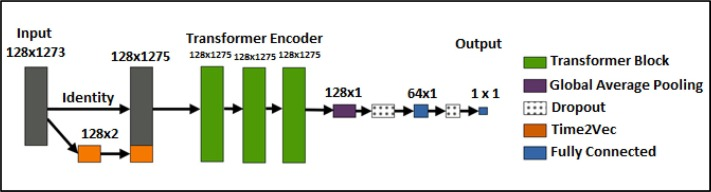

1. Input -> Time2Vec encoding + positional encoding

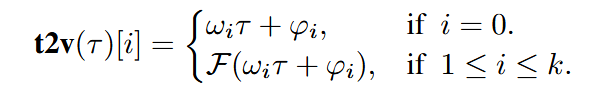

# MODEL V1

In [43]:
import torch
import torch.nn as nn
import math
import torch.nn.functional as F
import torch.optim as optim

In [44]:
class Time2Vec(nn.Module):
  def __init__(self, seq_len, kernel_size):
    super(Time2Vec, self).__init__()
    self.linear = nn.Linear(1,1)      #i = 0
    self.seq_len = seq_len
    self.periodic = nn.Linear(1, kernel_size-1) # i = 1:k
  def forward(self, x):
    seq_len = x.size(1)
    t = torch.arange(seq_len).float().unsqueeze(1).to(x.device)
    lin = self.linear(t)
    sin = torch.sin(self.periodic(t)) # F: sin
    time_embedding = torch.cat([lin, sin], dim=1)  # (seq_len, out_features)
    time_embedding = time_embedding.unsqueeze(0).repeat(x.size(0), 1, 1)  # (batch_size, seq_len, out_features)
    return time_embedding

Các chỉ số đầu vào:
- số lượng đặc trưng: input_dim
- số chiều của time2vec: time2vec_dim
- số chiều của vector biểu diễn cho mỗi bước thời gian: d_model


In [53]:
class Transformer(nn.Module):
  def __init__(self,seq_len,num_classes ,input_dim, time2vec_dim, d_model, nhead, num_layers):
    super(Transformer, self).__init__()
    self.time2vec = Time2Vec(seq_len,time2vec_dim)
    self.input_projection = nn.Linear(input_dim + time2vec_dim, d_model)
    encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
    self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
    self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
    self.dropout = nn.Dropout(0.2)
    self.fc1 = nn.Linear(d_model, 32)
    self.fc2 = nn.Linear(32,num_classes)
  def forward(self, x):
    t2v = self.time2vec(x) # (batch_size, seq_len, time2vec_dim)
    x = torch.cat([x, t2v], dim=-1) #(batch_size, seq_len, time2vec_dim + input_dim)
    x = self.input_projection(x)  
    x = self.encoder(x)
    x = x.transpose(1,2) #(batch_size, total_input_dim, seq_len)
    x = self.global_avg_pool(x).squeeze(-1)
    x = self.dropout(x)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x

In [58]:
def train(model, optimizer, criterion, train_loader, epochs=20):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        correct = 0
        total = 0
        for data, labels in train_loader:
            data, labels = data.to('cuda'), labels.to('cuda')
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs.squeeze(), labels.long())
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            _,predictions = torch.max(outputs, 1)
            correct += (predictions==labels).sum().item()
            total += labels.size(0)
        avg_loss = epoch_loss/len(train_loader)
        accuracy = correct / total *100
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")

In [54]:
seq_len = 60
num_classes = 3
epochs =20
learning_rate = 0.0001
num_layers = 2
input_dim = 6
time2vec_dim = 4
d_model = 64
nhead = 4
model = Transformer(seq_len, num_classes, input_dim, time2vec_dim, d_model, nhead, num_layers).cuda()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
loss_function = nn.CrossEntropyLoss()

In [59]:
train(model, optimizer, loss_function, train_loader,epochs)

KeyboardInterrupt: 